# Intoduction

When running on Colab, install necessary libraries.

In [ ]:
!pip install qiskit --quiet
!pip install pylatexenc --quiet

In [1]:
# import baisic python
import numpy as np
from IPython.display import Latex as lt
import random

import math
from math import pi

# import Qiskit
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

# import the visulization
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
# set backend
backend = BasicAer.get_backend('qasm_simulator')
nshot = 30000

## Creating "function PastaQ.gate"
Single Matrix 

\begin{bmatrix}
\cos{\theta/2} & (-i \exp^{-i \phi} \sin(\theta/2))\\
 (-i \exp^{i \phi} \sin(\theta/2)) & \cos(\theta/2)
\end{bmatrix}

Double Matrix

\begin{bmatrix}
        \cos(\Theta) &   0 &   0 &   -i \sin(\Theta)\\
        0    &\cos(\Theta)   & -i \sin(\Theta)    &0\\
        0    &-i \sin(\Theta)  &  \cos(\Theta)    &0\\
        -i \sin(\Theta) &   0  &  0   & \cos(\Theta)\\
\end{bmatrix}

In [3]:
def gateSingle(theta, phi):
    j = complex(0, 1)
    return Operator(
        np.matrix(
            [[np.cos(theta / 2), (-j * np.exp(-j * phi) * np.sin(theta / 2))],
             [(-j * np.exp(j * phi) * np.sin(theta / 2)),
              np.cos(theta / 2)]]))


def gateDouble(Theta):
    j = complex(0, 1)
    return Operator(
        np.matrix([[np.cos(Theta), 0, 0, (-j * np.sin(Theta))],
                   [0, np.cos(Theta), (-j * np.sin(Theta)), 0],
                   [0, (-j * np.sin(Theta)),
                    np.cos(Theta), 0],
                   [(-j * np.sin(Theta)), 0, 0,
                    np.cos(Theta)]]))

In [4]:
# Example Testing
r1 = pi * random.random()
gateSingle(r1, r1)
gateDouble(r1)

Operator([[0.35867704+0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        -0.93346172j],
          [0.        +0.j        , 0.35867704+0.j        ,
           0.        -0.93346172j, 0.        +0.j        ],
          [0.        +0.j        , 0.        -0.93346172j,
           0.35867704+0.j        , 0.        +0.j        ],
          [0.        -0.93346172j, 0.        +0.j        ,
           0.        +0.j        , 0.35867704+0.j        ]],
         input_dims=(2, 2), output_dims=(2, 2))

In [5]:
def run(N, depth):
    # N is number of Qubit
    # depth is the iteration of single and double Qubit

    # Create base circuits
    qr = QuantumRegister(N, 'q')
    cr = ClassicalRegister(N, 'c')
    circ = QuantumCircuit(qr, cr)

    for i in range(depth):
        # Apply single-qubit random rotation for all the qubit
        for j in range(N):
            circ.append(
                gateSingle(2 * pi * random.random(), 2 * pi * random.random()),
                [j])

        # Julia started with index 1, so I need to change it by i+1, then I change back on Range
        idx_first = (i + 1) % 2 + 1

        for j in range(idx_first - 1, N - 1, 2):
            circ.append(gateDouble(2 * pi * random.random()), [j, j + 1])
        circ.barrier(qr)

    circ.measure(qr, cr)
    return circ

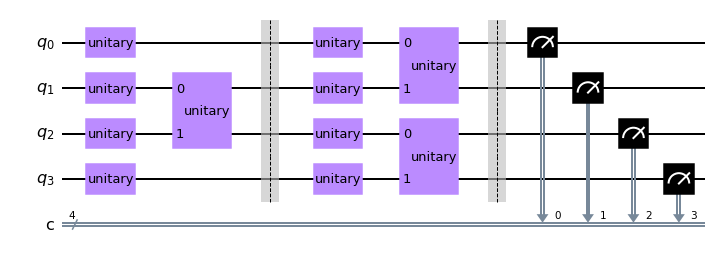

In [6]:
qc = run(4, 2)
qc.draw(output='mpl')

# Task 1

## Speckle Patterns

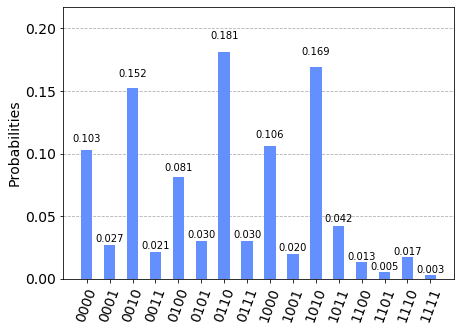

In [7]:
random.seed(1)
qc = run(4, 2)
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [8]:
# sort the coefficients [0000,0001,0010,....1111]
sortCoeff = list(dict(sorted(counts.items())).values())

# Create Figure and plots
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(2**4):
    ax.scatter(i, 1, s=sortCoeff[i], c='r')
ax.set_aspect(10)
ax.axis("off")

(-0.7679209763087962,
 15.79289424437237,
 0.9743290546320791,
 1.0256709453679207)

## Visualization : Depths and widths

In [9]:
def getplot(N, depth):
    qc = run(N, depth)
    result = execute(qc, backend, shots=nshot).result()
    counts = result.get_counts(qc)
    sortCoeff = list(dict(sorted(counts.items())).values())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(2**N):
        ax.scatter(i, 1, s=200 * sortCoeff[i] / nshot, c='r')
    ax.set_aspect(10)
    ax.set_title("Speckle Patterns")
    ax.axis("off")

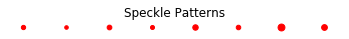

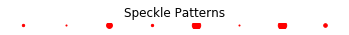

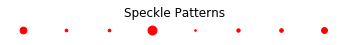

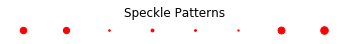

In [10]:
random.seed(1)
getplot(3, 2)
getplot(3, 3)
getplot(3, 4)
getplot(3, 5)

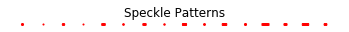

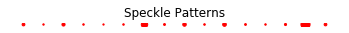

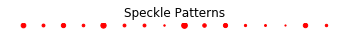

In [11]:
random.seed(1)
getplot(4, 1)
getplot(4, 2)
getplot(4, 3)
getplot(4, 4)

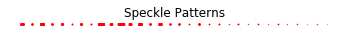

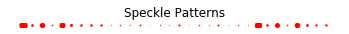

In [12]:
random.seed(1)
getplot(5, 1)
getplot(5, 2)
getplot(5, 3)
getplot(5, 4)

# Task 2

Bit-flip Error
\begin{align}
\sigma = 
\begin{bmatrix}
0 & 1\\
 1 & 0
\end{bmatrix}
\end{align}

In [13]:
def bitflip():
    return Operator(np.matrix([[0, 1], [1, 0]]))

## Analysis: Total Possible Error Location

### Odd Case N

For odd case, we can see there are 

$N * depth + (N-1)*depth$

possible location for the bit-flip error


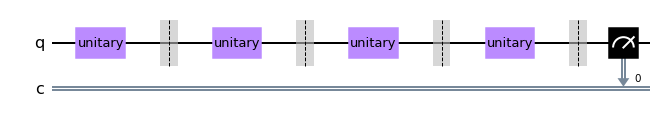

In [14]:
run(1, 4).draw(output='mpl')

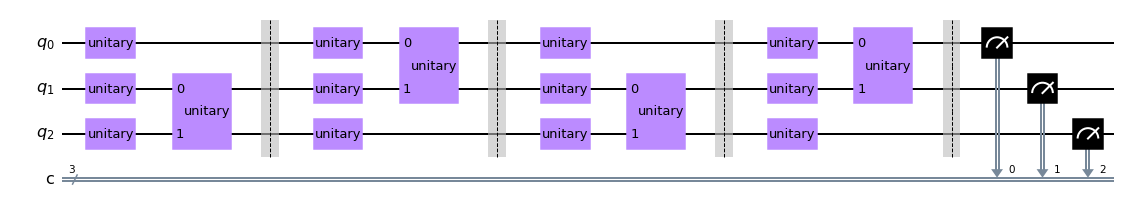

In [15]:
run(3, 4).draw(output='mpl')

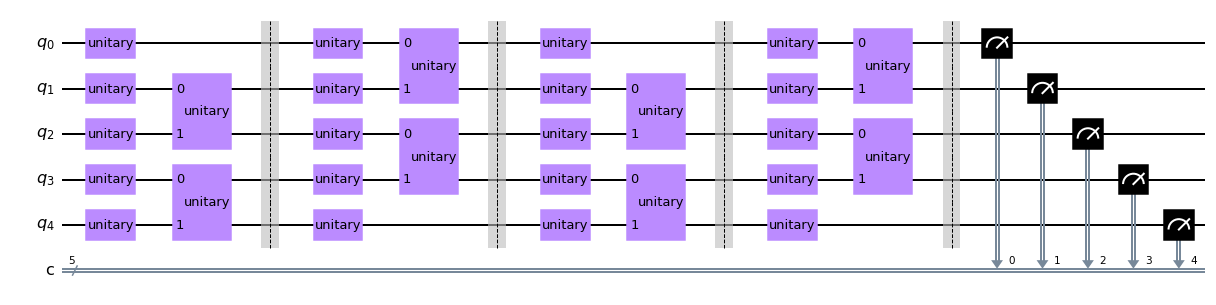

In [16]:
run(5, 4).draw(output='mpl')

### Even Case N

For even case, we can see there are 

$N * depth + (N-2)*depth+  \sum_{i=1}^{depth} 1+(-1)^i $

possible location for the bit-flip error

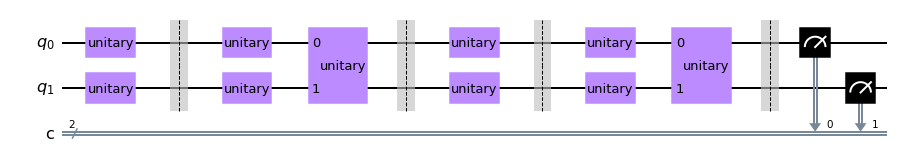

In [17]:
run(2, 4).draw(output='mpl')

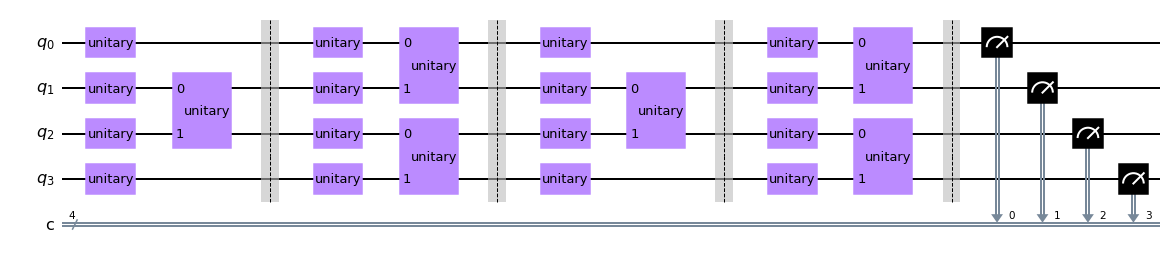

In [18]:
run(4, 4).draw(output='mpl')

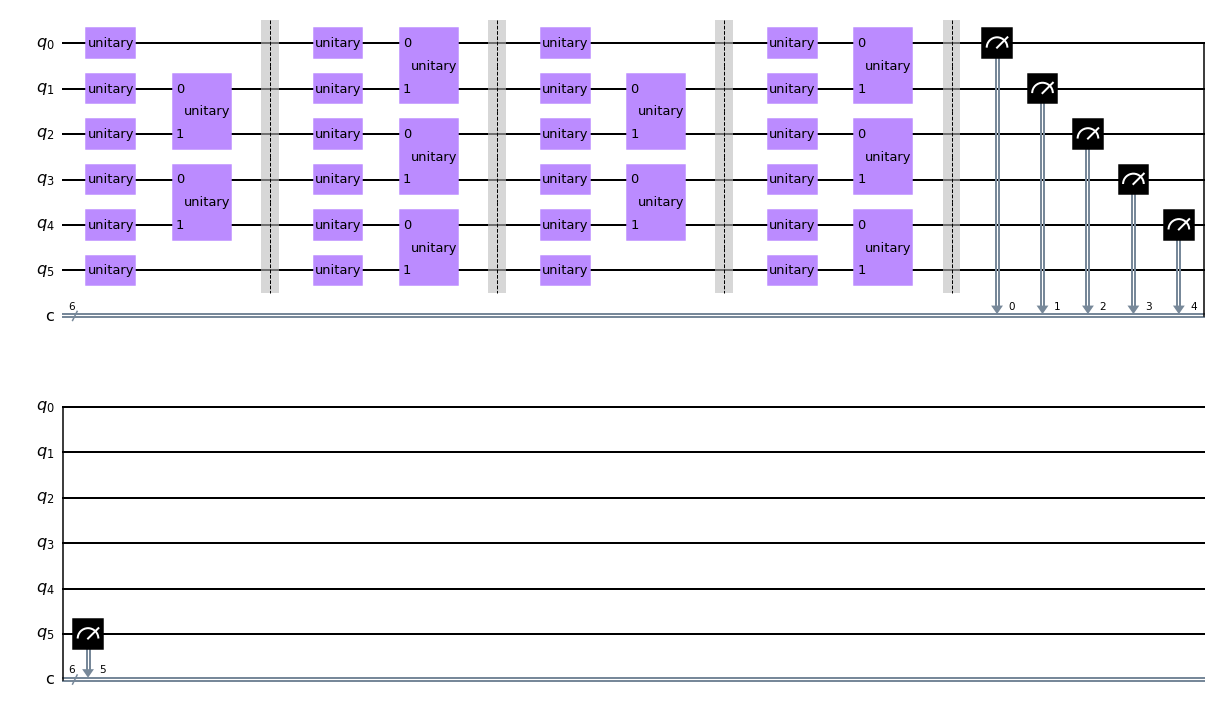

In [19]:
run(6, 4).draw(output='mpl')

In [20]:
# run one random circuit multiple times, but with a single bit-flip error
# at a random location in the circuit each time


def runError(N, depth):
    # N is number of Qubit
    # depth is the iteration of single and double Qubit

    # total number of possible error location
    if (N % 2 == 0):
        locPred = N * depth + \
            (((N-2)*depth + sum([1+(-1)**(i+1) for i in range(depth)])))
    else:
        locPred = N * depth + (N - 1) * depth

    # randomly choose the location of bit-flip error
    bitFlipLoc = random.randint(1, locPred)
    loc = 0

    # Create base circuits
    qr = QuantumRegister(N, 'q')
    cr = ClassicalRegister(N, 'c')
    circ = QuantumCircuit(qr, cr)

    for i in range(depth):
        # Apply single-qubit random rotation for all the qubit
        for j in range(N):
            circ.append(
                gateSingle(2 * pi * random.random(), 2 * pi * random.random()),
                [j])
            loc = loc + 1  # add one for each
            if (bitFlipLoc == loc):
                circ.append(bitflip(), [j])

        # Julia started with index 1, so I need to change it by i+1, then I change back on Range
        idx_first = (i + 1) % 2 + 1

        for j in range(idx_first - 1, N - 1, 2):
            circ.append(gateDouble(2 * pi * random.random()), [j, j + 1])
            loc = loc + 1  # two location because of entangling gate
            if (bitFlipLoc == loc):
                circ.append(bitflip(), [j])
            loc = loc + 1  # two location because of entangling gate
            if (bitFlipLoc == loc):
                circ.append(bitflip(), [j + 1])
        circ.barrier(qr)

    circ.measure(qr, cr)
    return circ

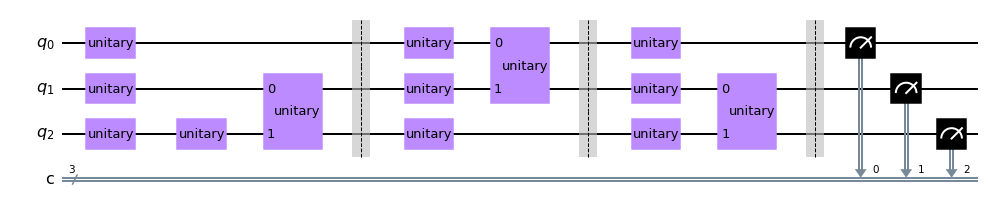

In [21]:
random.seed(1)
runError(3, 3).draw(output='mpl')

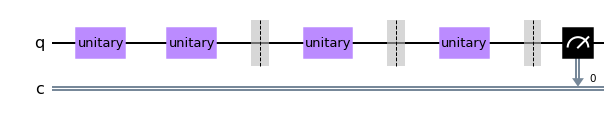

In [22]:
random.seed(1)
runError(1, 3).draw(output='mpl')

## Visualization : Error Speckle

In [23]:
# the devic
def getErrorplot(N, depth):
    qc = runError(N, depth)
    result = execute(qc, backend, shots=nshot).result()
    counts = result.get_counts(qc)
    sortCoeff = list(dict(sorted(counts.items())).values())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(2**N):
        ax.scatter(i, 1, s=200 * sortCoeff[i] / nshot, c='r')
    ax.set_aspect(10)
    ax.set_title("Bit-Flip Error")
    ax.axis("off")

### N=2

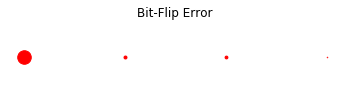

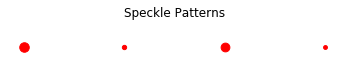

In [24]:
random.seed(1)
getErrorplot(2, 1)
random.seed(1)
getplot(2, 1)

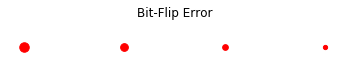

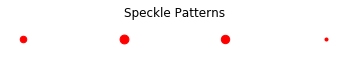

In [25]:
random.seed(1)
getErrorplot(2, 2)
random.seed(1)
getplot(2, 2)

### N=3

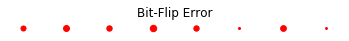

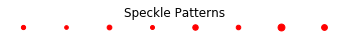

In [26]:
random.seed(1)
getErrorplot(3, 2)
random.seed(1)
getplot(3, 2)

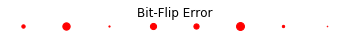

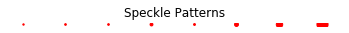

In [27]:
random.seed(1)
getErrorplot(3, 4)
random.seed(1)
getplot(3, 4)

### N=5

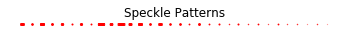

In [28]:
random.seed(1)
getErrorplot(5, 1)
random.seed(1)
getplot(5, 1)

In [29]:
random.seed(1)
getErrorplot(5, 4)
random.seed(1)
getplot(5, 4)